In [1]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os, time
import pandas as pd

import tensorflow as tf
from tensorflow import keras

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rc('figure', dpi=100)
import seaborn as sns; sns.set()

In [2]:
from sklearn.model_selection import train_test_split

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Split the original training data into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

170498071/170498071 [==============================] - 3s 0us/step


In [3]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'X_validation shape: {X_valid.shape}')

X_train shape: (40000, 32, 32, 3)
X_test shape: (10000, 32, 32, 3)
X_validation shape: (10000, 32, 32, 3)


In [4]:
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'y_validation shape: {y_valid.shape}')

y_train shape: (40000, 1)
y_test shape: (10000, 1)
y_validation shape: (10000, 1)


In [5]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1, )
y_valid = y_valid.reshape(-1, )

In [6]:
print(f"y train shape: {y_train}")
print(f"y test shape: {y_test}")
print(f'y valid shape: {y_valid}')

y train shape: [6 2 5 ... 8 8 8]
y test shape: [3 8 8 ... 5 1 7]
y valid shape: [7 8 0 ... 8 2 6]


In [7]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [8]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.grid(False)
    plt.xlabel(classes[y[index]])

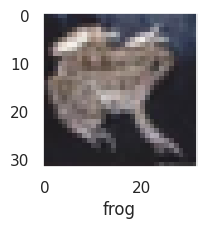

In [9]:
plot_sample(X_train, y_train, 0)

In [10]:
X_train = X_train / 255.0
X_test = X_test / 255.0
X_valid = X_valid / 255.0

In [11]:
from tensorflow.keras.utils import to_categorical

y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)
y_valid_one_hot = to_categorical(y_valid, num_classes=10)

# CNN #

In [12]:
cnn_model = keras.models.Sequential()

cnn_model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
cnn_model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
cnn_model.add(keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
cnn_model.add(keras.layers.MaxPooling2D((2, 2)))

cnn_model.add(keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'))
cnn_model.add(keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same'))
cnn_model.add(keras.layers.MaxPooling2D((2, 2)))

cnn_model.add(keras.layers.Flatten())

cnn_model.add(keras.layers.Dense(64, activation='relu'))
cnn_model.add(keras.layers.Dense(10, activation='softmax'))

In [13]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 128)       0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 256)       295168    
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 512)       1180160   
                                                        

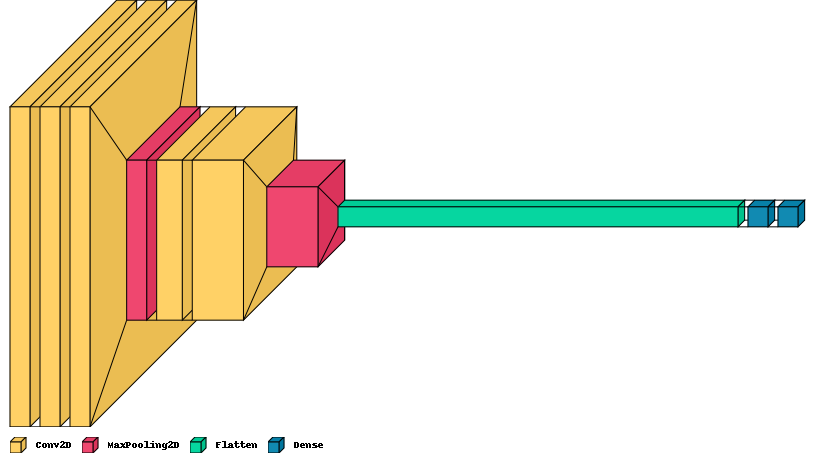

In [16]:
import visualkeras
visualkeras.layered_view(cnn_model, scale_xy=10, legend=True)

In [17]:
from tensorflow.keras.optimizers import Adam

cnn_model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_generator = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    rotation_range = 10,
    zoom_range = 0.2
)

In [20]:
batch_size = 512
train_generator = data_generator.flow(X_train, y_train_one_hot, batch_size=batch_size)

In [21]:
cnn_his = cnn_model.fit(train_generator, epochs=50, validation_data=(X_valid, y_valid_one_hot), callbacks=[callback])

Epoch 1/50
79/79 [==============================] - 57s 364ms/step - loss: 1.9126 - accuracy: 0.2989 - val_loss: 1.5796 - val_accuracy: 0.4311
Epoch 2/50
79/79 [==============================] - 29s 366ms/step - loss: 1.5185 - accuracy: 0.4486 - val_loss: 1.3267 - val_accuracy: 0.5162
Epoch 3/50
79/79 [==============================] - 27s 347ms/step - loss: 1.3369 - accuracy: 0.5218 - val_loss: 1.2096 - val_accuracy: 0.5712
Epoch 4/50
79/79 [==============================] - 28s 357ms/step - loss: 1.1945 - accuracy: 0.5742 - val_loss: 1.1616 - val_accuracy: 0.5928
Epoch 5/50
79/79 [==============================] - 27s 338ms/step - loss: 1.0858 - accuracy: 0.6167 - val_loss: 1.0404 - val_accuracy: 0.6389
Epoch 6/50
79/79 [==============================] - 27s 342ms/step - loss: 0.9856 - accuracy: 0.6521 - val_loss: 0.8819 - val_accuracy: 0.6937
Epoch 7/50
79/79 [==============================] - 28s 350ms/step - loss: 0.9200 - accuracy: 0.6770 - val_loss: 0.7964 - val_accuracy: 0.7211

In [22]:
cnn_model.evaluate(X_test, y_test_one_hot)

313/313 [==============================] - 2s 6ms/step - loss: 0.5441 - accuracy: 0.8496


[0.5440756678581238, 0.8496000170707703]

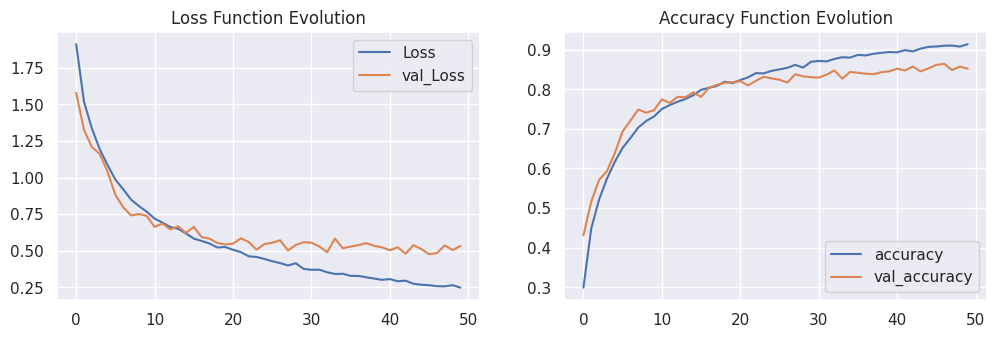

In [23]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(cnn_his.history['loss'], label='Loss')
plt.plot(cnn_his.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(cnn_his.history['accuracy'], label='accuracy')
plt.plot(cnn_his.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

In [24]:
from sklearn.metrics import confusion_matrix , classification_report
y_pred = cnn_model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 2s 5ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.86      0.88      1000
           1       0.91      0.94      0.93      1000
           2       0.87      0.73      0.80      1000
           3       0.82      0.60      0.69      1000
           4       0.81      0.84      0.83      1000
           5       0.83      0.80      0.81      1000
           6       0.71      0.96      0.82      1000
           7       0.87      0.91      0.89      1000
           8       0.94      0.91      0.92      1000
           9       0.88      0.93      0.91      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [25]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred_classes)

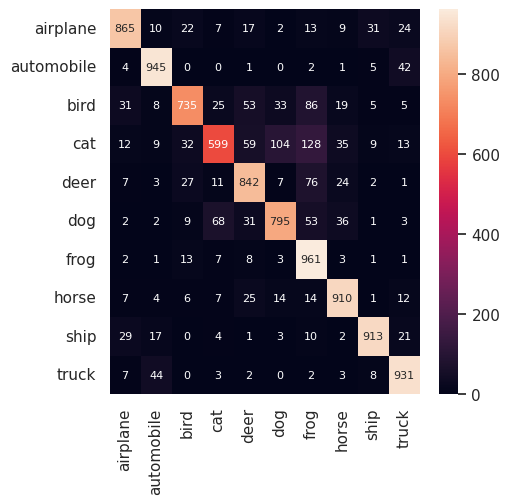

In [26]:
import seaborn as sn
df_cm = pd.DataFrame(matrix, classes, classes)
plt.figure(figsize=(5,5))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 8}, fmt="g")
plt.show()

 Image 50 is 9
1/1 [==============================] - 0s 207ms/step
The model predict that image 50 is 9


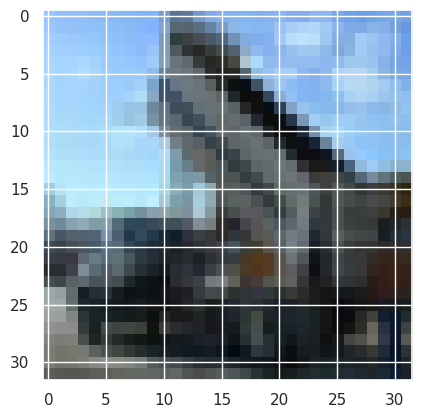

In [27]:
testing_image = X_test[50]
plt.imshow(testing_image)

print(f" Image 50 is {y_test[50]}")

pred_50 = np.argmax(cnn_model.predict(testing_image.reshape(1, 32, 32, 3)))
print(f"The model predict that image 50 is {pred_50}")

## DenseNet121 ##

In [28]:
base_model = tf.keras.applications.DenseNet121(include_top=False, weights='imagenet', input_tensor=None, input_shape=(224, 224, 3), pooling=None, classes=10)
base_model.trainable = False
inputs = tf.keras.Input(shape=(32, 32, 3))

resize_l = tf.keras.layers.Lambda(
    lambda x: tf.image.resize(x, (224, 224), method=tf.image.ResizeMethod.BILINEAR, antialias=False),
    output_shape=(224, 224, 3))(inputs)

x = base_model(resize_l, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(units=10, activation='softmax')(x)

den_model = tf.keras.Model(inputs, outputs)

den_model.summary()

29084464/29084464 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 lambda (Lambda)             (None, 224, 224, 3)       0         
                                                                 
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 global_average_pooling2d (  (None, 1024)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_2 (Dense)             (None, 10)                10250     
                                                                 
Total params: 7047754 (26.89 MB)
Trainable params: 10250 (40.0

In [29]:
den_model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_generator = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    rotation_range = 10,
    zoom_range = 0.2
)

In [31]:
batch_size = 64
train_generator = data_generator.flow(X_train, y_train_one_hot, batch_size=batch_size)

In [32]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [33]:
den_his = den_model.fit(train_generator, epochs=10, validation_data=(X_valid, y_valid_one_hot), callbacks=[callback])

Epoch 1/10
625/625 [==============================] - 164s 246ms/step - loss: 1.1133 - accuracy: 0.6291 - val_loss: 0.6545 - val_accuracy: 0.7771
Epoch 2/10
625/625 [==============================] - 138s 221ms/step - loss: 0.8128 - accuracy: 0.7272 - val_loss: 0.6007 - val_accuracy: 0.7952
Epoch 3/10
625/625 [==============================] - 151s 242ms/step - loss: 0.7559 - accuracy: 0.7424 - val_loss: 0.5780 - val_accuracy: 0.8029
Epoch 4/10
625/625 [==============================] - 138s 221ms/step - loss: 0.7183 - accuracy: 0.7533 - val_loss: 0.5628 - val_accuracy: 0.8069
Epoch 5/10
625/625 [==============================] - 138s 221ms/step - loss: 0.7027 - accuracy: 0.7604 - val_loss: 0.5398 - val_accuracy: 0.8162
Epoch 6/10
625/625 [==============================] - 151s 242ms/step - loss: 0.6880 - accuracy: 0.7623 - val_loss: 0.5349 - val_accuracy: 0.8153
Epoch 7/10
625/625 [==============================] - 152s 242ms/step - loss: 0.6766 - accuracy: 0.7667 - val_loss: 0.5229 -

In [34]:
den_model.evaluate(X_test, y_test_one_hot)

313/313 [==============================] - 29s 92ms/step - loss: 0.5648 - accuracy: 0.8053


[0.5647746324539185, 0.8052999973297119]

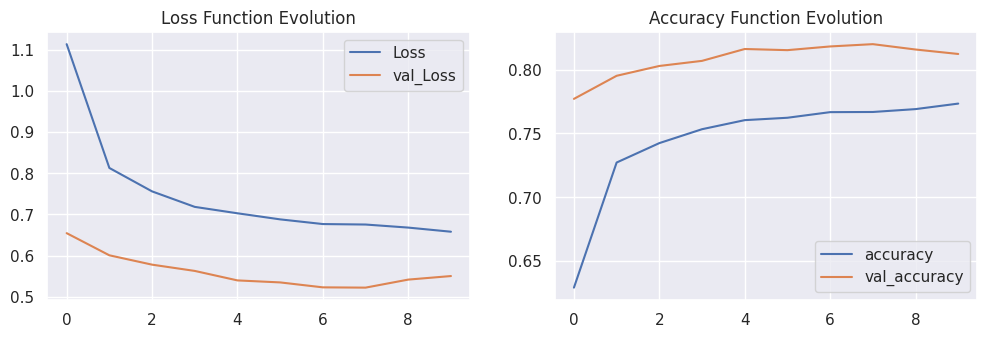

In [35]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(den_his.history['loss'], label='Loss')
plt.plot(den_his.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(den_his.history['accuracy'], label='accuracy')
plt.plot(den_his.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

In [36]:
from sklearn.metrics import confusion_matrix , classification_report
y_pred = den_model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 29s 88ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.84      0.84      1000
           1       0.87      0.90      0.89      1000
           2       0.86      0.66      0.74      1000
           3       0.77      0.60      0.68      1000
           4       0.84      0.67      0.75      1000
           5       0.78      0.75      0.76      1000
           6       0.65      0.96      0.77      1000
           7       0.81      0.88      0.84      1000
           8       0.88      0.88      0.88      1000
           9       0.83      0.92      0.87      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.80     10000
weighted avg       0.81      0.81      0.80     10000



In [37]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred_classes)

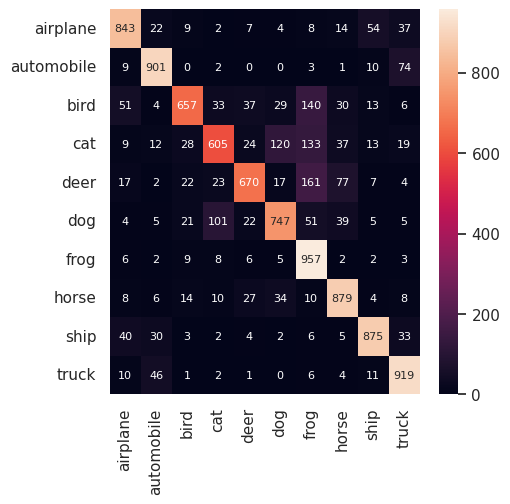

In [38]:
import seaborn as sn
df_cm = pd.DataFrame(matrix, classes, classes)
plt.figure(figsize=(5,5))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 8}, fmt="g")
plt.show()

## ResNet50 ##

In [ ]:
def feature_extractor(inputs):

  feature_extractor = tf.keras.applications.resnet.ResNet50(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')(inputs)
  return feature_extractor


def classifier(inputs):
    x = tf.keras.layers.GlobalAveragePooling2D()(inputs)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(1024, activation="relu")(x)
    x = tf.keras.layers.Dense(512, activation="relu")(x)
    x = tf.keras.layers.Dense(10, activation="softmax", name="classification")(x)
    return x


def final_model(inputs):

    resize = tf.keras.layers.UpSampling2D(size=(7,7))(inputs)

    resnet_feature_extractor = feature_extractor(resize)
    classification_output = classifier(resnet_feature_extractor)

    return classification_output

def define_compile_model():
  inputs = tf.keras.layers.Input(shape=(32,32,3))

  classification_output = final_model(inputs)
  model = tf.keras.Model(inputs=inputs, outputs = classification_output)

  model.compile(optimizer='Adam',
                loss='categorical_crossentropy',
                metrics = ['accuracy'])

  return model


model = define_compile_model()

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 up_sampling2d_2 (UpSamplin  (None, 224, 224, 3)       0         
 g2D)                                                            
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_2  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 flatten_6 (Flatten)         (None, 2048)              0         
                                                                 
 dense_16 (Dense)            (None, 1024)              2098

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_generator = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    rotation_range = 10,
    zoom_range = 0.2
)

In [ ]:
batch_size = 64
train_generator = data_generator.flow(X_train, y_train_one_hot, batch_size=batch_size)

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [ ]:
history = model.fit(X_train, y_train_one_hot, epochs=10, validation_data = (X_test, y_test_one_hot), callbacks=[callback])

Epoch 1/10
1563/1563 [==============================] - 604s 367ms/step - loss: 0.9863 - accuracy: 0.6557 - val_loss: 1.1625 - val_accuracy: 0.6158
Epoch 2/10
1563/1563 [==============================] - 570s 365ms/step - loss: 0.5691 - accuracy: 0.8052 - val_loss: 0.6151 - val_accuracy: 0.7865
Epoch 3/10
1563/1563 [==============================] - 570s 365ms/step - loss: 0.4219 - accuracy: 0.8568 - val_loss: 0.6933 - val_accuracy: 0.7846
Epoch 4/10
1563/1563 [==============================] - 558s 357ms/step - loss: 0.3167 - accuracy: 0.8914 - val_loss: 0.6170 - val_accuracy: 0.8124
Epoch 5/10
1563/1563 [==============================] - 569s 364ms/step - loss: 0.2512 - accuracy: 0.9150 - val_loss: 0.7546 - val_accuracy: 0.7852
Epoch 6/10
1563/1563 [==============================] - 558s 357ms/step - loss: 0.1864 - accuracy: 0.9369 - val_loss: 0.5051 - val_accuracy: 0.8474
Epoch 7/10
1563/1563 [==============================] - 569s 364ms/step - loss: 0.1455 - accuracy: 0.9496 - val_

In [ ]:
model.evaluate(X_test, y_test_one_hot)

313/313 [==============================] - 30s 97ms/step - loss: 0.5950 - accuracy: 0.8589


[0.5949962139129639, 0.8589000105857849]

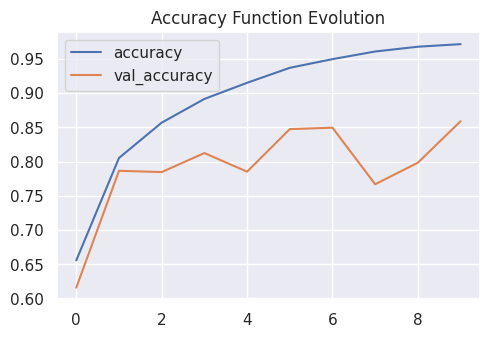

In [ ]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 31s 96ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.92      0.86      1000
           1       0.86      0.98      0.91      1000
           2       0.71      0.91      0.80      1000
           3       0.81      0.71      0.76      1000
           4       0.87      0.82      0.84      1000
           5       0.91      0.71      0.80      1000
           6       0.89      0.92      0.90      1000
           7       0.90      0.89      0.90      1000
           8       0.95      0.91      0.93      1000
           9       0.97      0.82      0.89      1000

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000



In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred_classes)

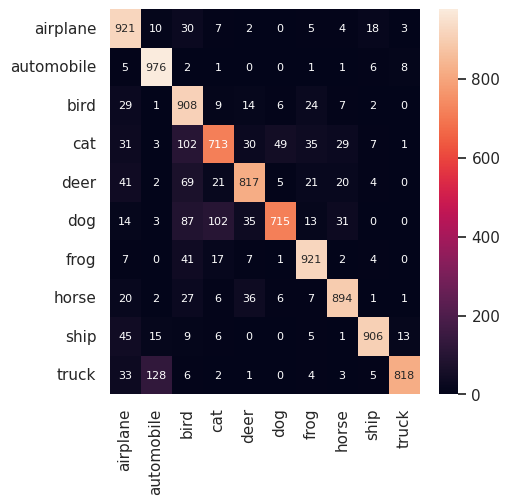

In [ ]:
import seaborn as sn
df_cm = pd.DataFrame(matrix, classes, classes)
plt.figure(figsize=(5,5))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 8}, fmt="g")
plt.show()